In [3]:
#Description. In this mini project we use a kaggle twitter dataset to 
#perform sentimental analysis on a certain product
#using the twiiter data

In [4]:
#Import the libraries

In [5]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [6]:
from textblob import TextBlob, Word, Blobber
from textblob.classifiers import NaiveBayesClassifier
from textblob.taggers import NLTKTagger

In [31]:
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

#NTLK imports
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

#sklearn imports
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nesta\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nesta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
#create a dataframe called tweets to plus also read the csv


tweets = pd.read_csv("iphone14-query-tweets.csv")

In [25]:
tweets.head()

,date_time,username,user_location,user_description,verified,followers_count,following_count,tweet_like_count,tweet_retweet_count,tweet_reply_count,source,tweet_text
0,2022-09-08 22:49:29+00:00,TheAppleGang101,NaN,A new account dedicated to all of the latest l...,False,10,28,0,0,0,"<a href=""http://twitter.com/#!/download/ipad"" ...",iPhone SE 3 gets more expensive in the UK afte...
1,2022-09-08 22:49:27+00:00,TheJessicats,1999,Tweet like nobody’s reading • standup comedian...,False,1642,1444,0,0,0,"<a href=""http://twitter.com/download/iphone"" r...",@Travon I hope it happens before my iPhone 14 ...
2,2022-09-08 22:49:16+00:00,itschefnotjeff,📌 mom's basement,👨🏽‍💻💳🎫✈️,False,77,87,0,0,0,"<a href=""http://twitter.com/download/android"" ...","Nah iphone 14 upgrade just not it, change my m..."
3,2022-09-08 22:49:09+00:00,HalfRonin,Between the darkness and light,Preferring to be the dumbest person in the roo...,False,549,717,0,0,0,"<a href=""http://twitter.com/download/iphone"" r...",To the shock of absolutely no one: \n\nApple: ...
4,2022-09-08 22:49:09+00:00,Deejayrayman,Texas,Father of 3. Follower of Christ. Lover of all ...,False,48,153,0,0,0,"<a href=""http://twitter.com/download/iphone"" r...",@TMobile @TMobileHelp will you be able to orde...


In [10]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144245 entries, 0 to 144244
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   date_time            144245 non-null  object
 1   username             144245 non-null  object
 2   user_location        97924 non-null   object
 3   user_description     127677 non-null  object
 4   verified             144245 non-null  bool  
 5   followers_count      144245 non-null  int64 
 6   following_count      144245 non-null  int64 
 7   tweet_like_count     144245 non-null  int64 
 8   tweet_retweet_count  144245 non-null  int64 
 9   tweet_reply_count    144245 non-null  int64 
 10  source               144245 non-null  object
 11  tweet_text           144245 non-null  object
dtypes: bool(1), int64(5), object(6)
memory usage: 12.2+ MB


In [11]:
#look for all null entries

tweets.isnull().sum()

date_time                  0
username                   0
user_location          46321
user_description       16568
verified                   0
followers_count            0
following_count            0
tweet_like_count           0
tweet_retweet_count        0
tweet_reply_count          0
source                     0
tweet_text                 0
dtype: int64

In [12]:
#Display all the column names

tweets.columns

Index(['date_time', 'username', 'user_location', 'user_description',
       'verified', 'followers_count', 'following_count', 'tweet_like_count',
       'tweet_retweet_count', 'tweet_reply_count', 'source', 'tweet_text'],
      dtype='object')

In [13]:
#create a dataframe(text_df) that only takes data column and we specify the axis
#it drops all columns except for "tweet_text"

text_df = tweets.drop(['date_time', 'username', 'user_location', 'user_description',
       'verified', 'followers_count', 'following_count', 'tweet_like_count',
       'tweet_retweet_count', 'tweet_reply_count', 'source',], axis = 1) #Axis 1 indicates the column


text_df.head()

,tweet_text
0,iPhone SE 3 gets more expensive in the UK afte...
1,@Travon I hope it happens before my iPhone 14 ...
2,"Nah iphone 14 upgrade just not it, change my m..."
3,To the shock of absolutely no one: \n\nApple: ...
4,@TMobile @TMobileHelp will you be able to orde...


In [14]:
#Next we analyze some fo the text data in our dataframe
print(text_df['tweet_text'].iloc[0],"\n")
print(text_df['tweet_text'].iloc[1],"\n")
print(text_df['tweet_text'].iloc[2],"\n")
print(text_df['tweet_text'].iloc[3],"\n")
print(text_df['tweet_text'].iloc[4],"\n")
print(text_df['tweet_text'].iloc[5],"\n")
print(text_df['tweet_text'].iloc[6],"\n")



iPhone SE 3 gets more expensive in the UK after the iPhone 14 event https://t.co/08sJ28TZ2W 

@Travon I hope it happens before my iPhone 14 arrives. 

Nah iphone 14 upgrade just not it, change my mind. 

To the shock of absolutely no one: 

Apple: Ready for the iPhone 14?
About the 3 ppl left who care: Yeah!
A: See also iPhone 13. 
3: Wut? 
A: see also iPhone 12 then. 
3: …
A: WANT ME TO GO BACK EVEN FURTHER??? 

@TMobile @TMobileHelp will you be able to order the iPhone 14 Pro online tomorrow? Or phone only? 

China's four major carriers do not support the US version of the iPhone 14 series because they don't support eSIM https://t.co/yy5ut1BEBA 

Apple set to unveil iPhone 14 and other gear https://t.co/bXS469DJgl 



In [15]:
#get info on text_df 
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144245 entries, 0 to 144244
Data columns (total 1 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   tweet_text  144245 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB


In [16]:
#create a text function that has all the text processing and then pass all the data into it
def data_processing(tweet_text):
    tweet_text = tweet_text.lower()
    tweet_text = re.sub(r"https\S+|www\S+https\S+", '',tweet_text, flags=re.MULTILINE)
    tweet_text = re.sub(r'\@w+|\#','',tweet_text)
    tweet_text = re.sub(r'[^\w\s]','',tweet_text)
    tweet_text_tokens = word_tokenize(tweet_text)
    filtered_tweet_text = [w for w in tweet_text_tokens if not w in stop_words]
    return " ".join(filtered_tweet_text)
      
    

In [17]:
#apply the pre-processing function on the data
text_df.tweet_text = text_df['tweet_text'].apply(data_processing)

In [18]:
#remove all the duplicate data 
text_df = text_df.drop_duplicates("tweet_text")


In [19]:
#perform stemming on the data using porterstemmer
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [20]:
#apply stemming to the processed data
text_df['tweet_text'] = text_df['tweet_text'].apply(lambda x: stemming(x))


In [21]:
text_df.head()

,tweet_text
0,iphone se 3 gets expensive uk iphone 14 event
1,travon hope happens iphone 14 arrives
2,nah iphone 14 upgrade change mind
3,shock absolutely one apple ready iphone 14 3 p...
4,tmobile tmobilehelp able order iphone 14 pro o...


In [22]:
#Next we analyze some fo the text data in our dataframe
print(text_df['tweet_text'].iloc[0],"\n")
print(text_df['tweet_text'].iloc[1],"\n")
print(text_df['tweet_text'].iloc[2],"\n")
print(text_df['tweet_text'].iloc[3],"\n")
print(text_df['tweet_text'].iloc[4],"\n")



iphone se 3 gets expensive uk iphone 14 event 

travon hope happens iphone 14 arrives 

nah iphone 14 upgrade change mind 

shock absolutely one apple ready iphone 14 3 ppl left care yeah see also iphone 13 3 wut see also iphone 12 3 want go back even 

tmobile tmobilehelp able order iphone 14 pro online tomorrow phone 



In [24]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108538 entries, 0 to 144243
Data columns (total 1 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   tweet_text  108538 non-null  object
dtypes: object(1)
memory usage: 1.7+ MB


In [26]:
#Next we use textblob by defining a function to calculate the polarity of the sentences
def polarity(tweet_text):
    return TextBlob(tweet_text).sentiment.polarity

In [27]:
#calculate the polarity in the df
text_df['polarity'] = text_df['tweet_text'].apply(polarity)

text_df.head(10)

,tweet_text,polarity
0,iphone se 3 gets expensive uk iphone 14 event,-0.500000
1,travon hope happens iphone 14 arrives,0.000000
2,nah iphone 14 upgrade change mind,0.000000
3,shock absolutely one apple ready iphone 14 3 p...,0.100000
4,tmobile tmobilehelp able order iphone 14 pro o...,0.500000
5,chinas four major carriers support us version ...,0.062500
6,apple set unveil iphone 14 gear,0.000000
7,iphone 14 proslightly used ashaiman washington...,0.000000
8,anyone getting new iphone 14 doesnt know old i...,-0.003409
9,slutforvegeta cause im tempted exchange iphone...,0.000000


In [28]:
#Lets add a sentiment column to the df
def sentiment(label):
    if label < 0:
        return "Negative"
    elif label == 0 :
        return "Neutral"
    elif label > 0:
        return "Positive"
        

In [29]:
#Lets apply the above function to the df
text_df['sentiment'] = text_df['polarity'].apply(sentiment)

text_df.head(10)

,tweet_text,polarity,sentiment
0,iphone se 3 gets expensive uk iphone 14 event,-0.500000,Negative
1,travon hope happens iphone 14 arrives,0.000000,Neutral
2,nah iphone 14 upgrade change mind,0.000000,Neutral
3,shock absolutely one apple ready iphone 14 3 p...,0.100000,Positive
4,tmobile tmobilehelp able order iphone 14 pro o...,0.500000,Positive
5,chinas four major carriers support us version ...,0.062500,Positive
6,apple set unveil iphone 14 gear,0.000000,Neutral
7,iphone 14 proslightly used ashaiman washington...,0.000000,Neutral
8,anyone getting new iphone 14 doesnt know old i...,-0.003409,Negative
9,slutforvegeta cause im tempted exchange iphone...,0.000000,Neutral


<Axes: xlabel='sentiment', ylabel='count'>

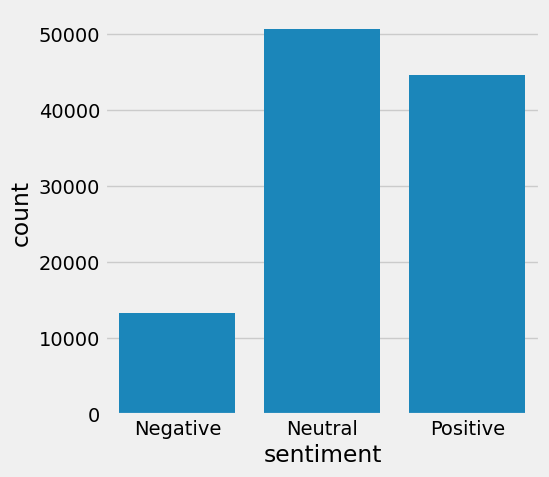

In [32]:
#visualize the above data
fig = plt.figure(figsize =(5,5))
sns.countplot(x = 'sentiment', data = text_df)

In [38]:
pos_tweets = text_df[text_df.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending = False)
pos_tweets.head()

,tweet_text,polarity,sentiment
59934,apple announces iphone 14 iphone 14 plus best ...,1.0,Positive
86931,iphone14fans best design year 10,1.0,Positive
40836,thisistechtoday tmobile elonmusk spacex apple ...,1.0,Positive
40839,much impressed iphone 14 series appleevent2022...,1.0,Positive
73491,wednesday going awesome day fuel going apple l...,1.0,Positive


<function matplotlib.pyplot.show(close=None, block=None)>

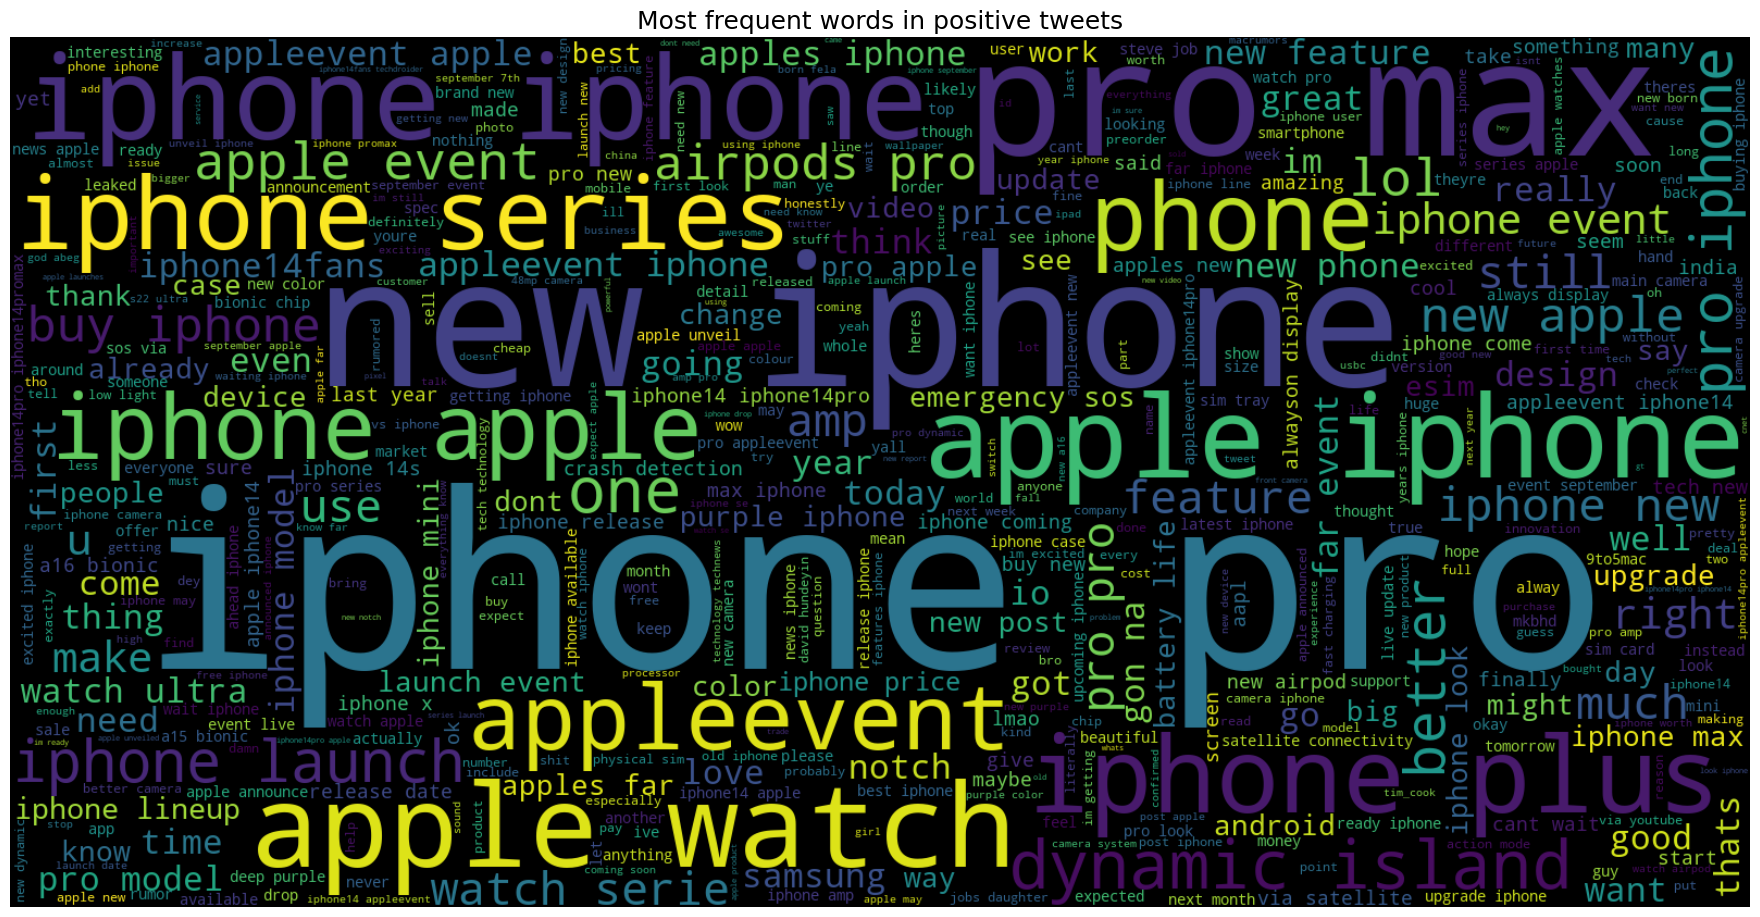

In [39]:
#wordcloud plot show
tweet_text = ' '.join([word for word in pos_tweets['tweet_text']])
plt.figure(figsize =(20,15), facecolor = 'None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(tweet_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive tweets', fontsize =18)
plt.show